**Part I: Data Analysis – Breast cancer wisconsin**

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import  accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [99]:
breast_cancer = pd.read_csv('breast_cancer_wisconsin.csv')

In [100]:
#Preprocessing steps
#Step1: Identify the missing values
print(breast_cancer.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [101]:
#Step2: Dropping unnamed Columns
breast_cancer_cleaned = breast_cancer.drop(columns=['Unnamed: 32'])

In [102]:
# Step5: Drop rows if of the remaining data is missing
breast_cancer_cleaned.dropna(inplace=True)


In [103]:
breast_cancer_cleaned['diagnosis'] = breast_cancer_cleaned['diagnosis'].map({'M': 1, 'B': 0}).astype(float)

In [104]:
#Step6: Getting the information
breast_cancer_cleaned.head()
breast_cancer_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    float64
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [105]:
#Step7: Statistics of the data
breast_cancer_cleaned.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


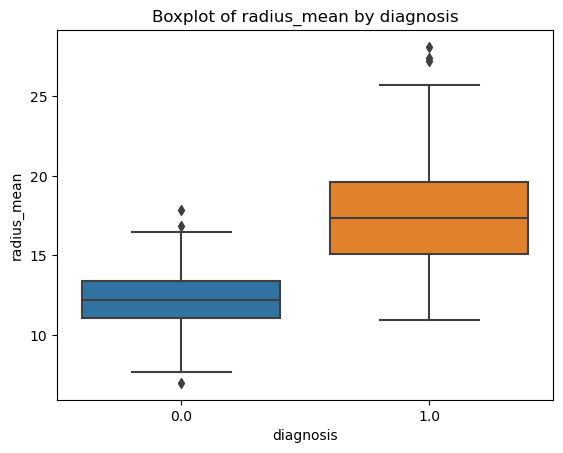

In [106]:
# Boxplot for the radius mean and diagnosis
sns.boxplot(x='diagnosis', y='radius_mean', data=breast_cancer_cleaned)
plt.title('Boxplot of radius_mean by diagnosis')
plt.show()

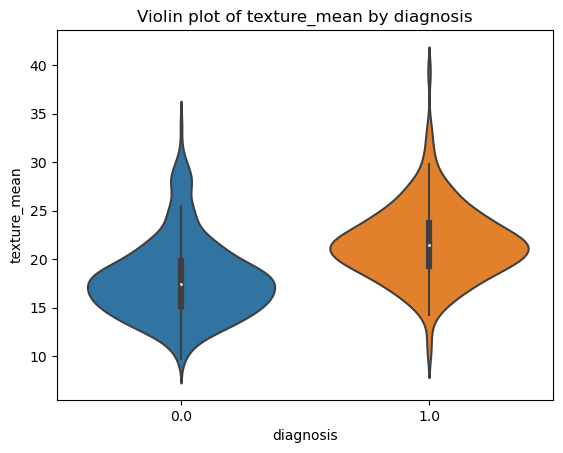

In [107]:
#Violin plot for the texture mean and diagnosis
sns.violinplot(x='diagnosis', y='texture_mean', data=breast_cancer_cleaned)
plt.title('Violin plot of texture_mean by diagnosis')
plt.show()

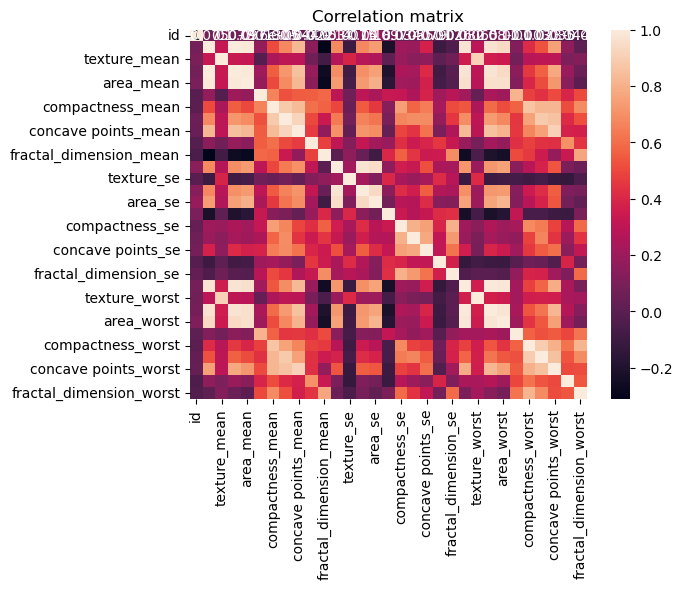

In [108]:
#Correlation matrix
corr_matrix = breast_cancer_cleaned.drop('diagnosis', axis = 1).corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation matrix')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

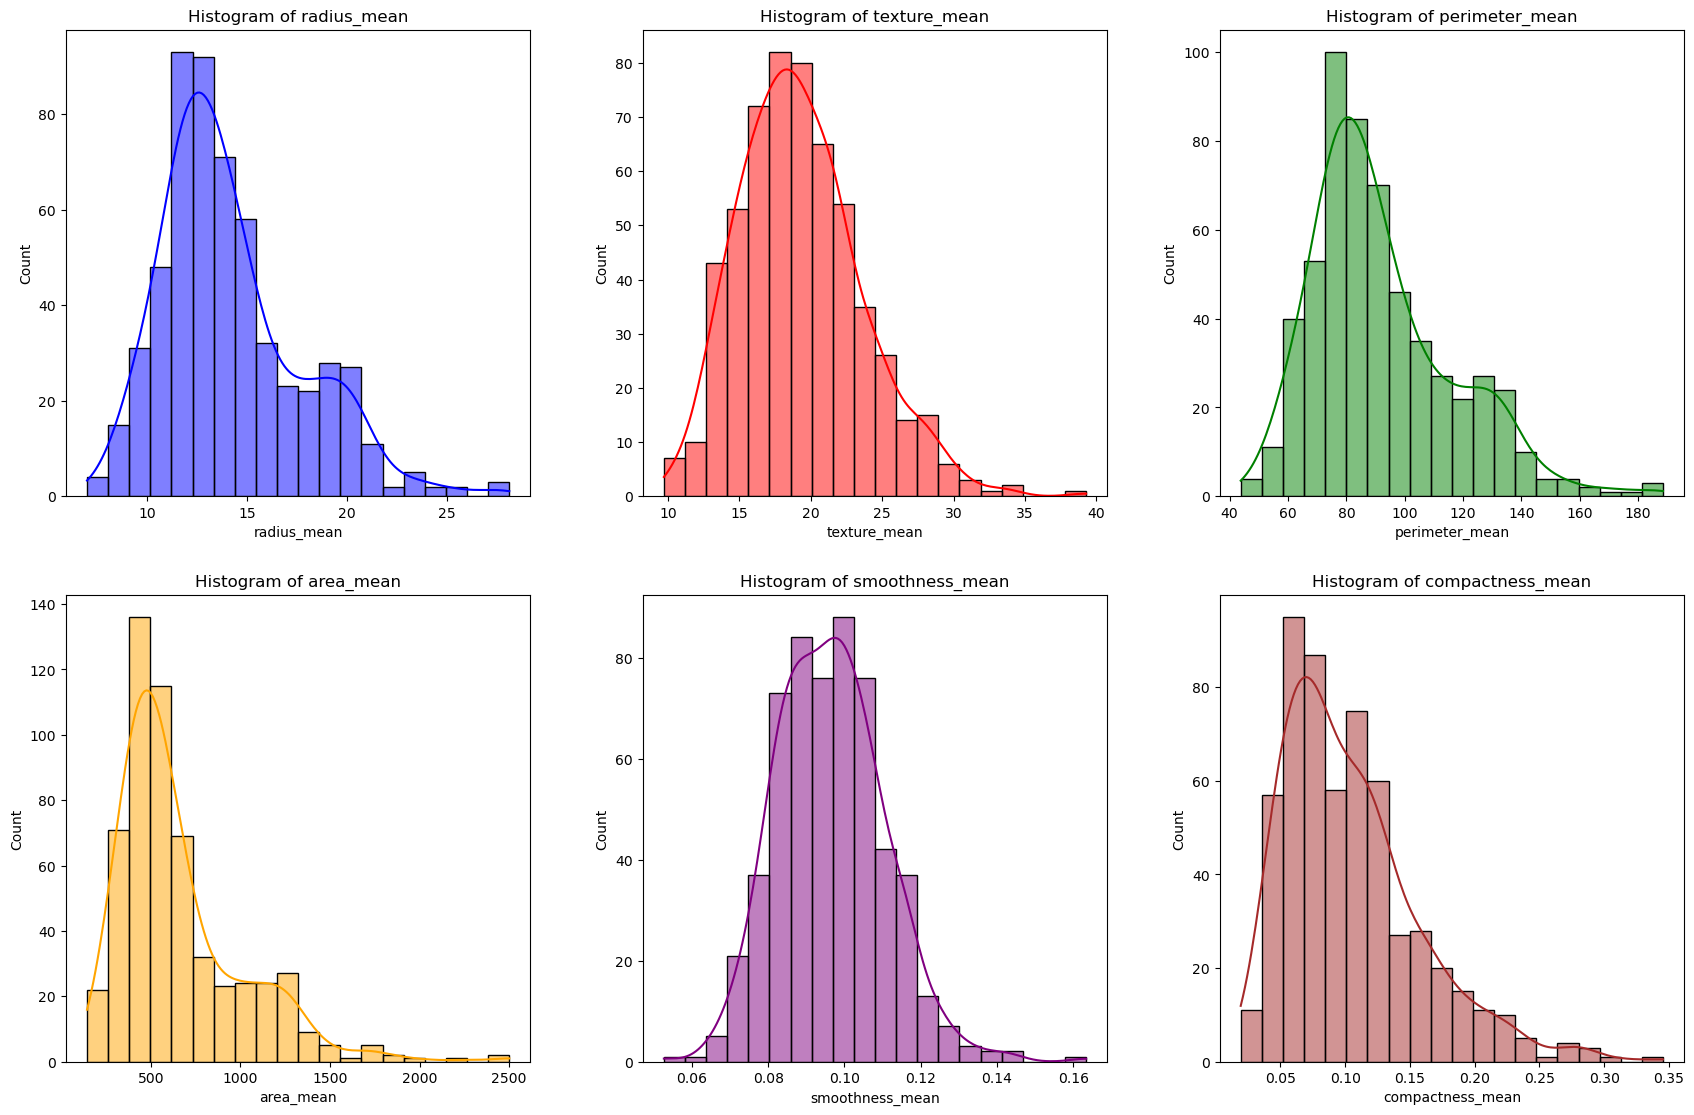

In [109]:
# Setup a maxplot figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.tight_layout(pad = 5.0)

#Histograms for the key features
sns.histplot(breast_cancer_cleaned['radius_mean'], bins = 20, kde=True, ax=axes[0,0], color = 'blue')
axes[0,0].set_title('Histogram of radius_mean')

sns.histplot(breast_cancer_cleaned['texture_mean'], bins = 20, kde=True, ax=axes[0,1], color = 'red')
axes[0,1].set_title('Histogram of texture_mean')

sns.histplot(breast_cancer_cleaned['perimeter_mean'], bins = 20, kde=True, ax=axes[0,2], color = 'green')
axes[0,2].set_title('Histogram of perimeter_mean')

sns.histplot(breast_cancer_cleaned['area_mean'], bins = 20, kde=True, ax=axes[1,0], color = 'orange')
axes[1,0].set_title('Histogram of area_mean')

sns.histplot(breast_cancer_cleaned['smoothness_mean'], bins = 20, kde=True, ax=axes[1,1], color = 'purple')
axes[1,1].set_title('Histogram of smoothness_mean')

sns.histplot(breast_cancer_cleaned['compactness_mean'], bins = 20, kde=True, ax=axes[1,2], color = 'brown')
axes[1,2].set_title('Histogram of compactness_mean')

plt.show()

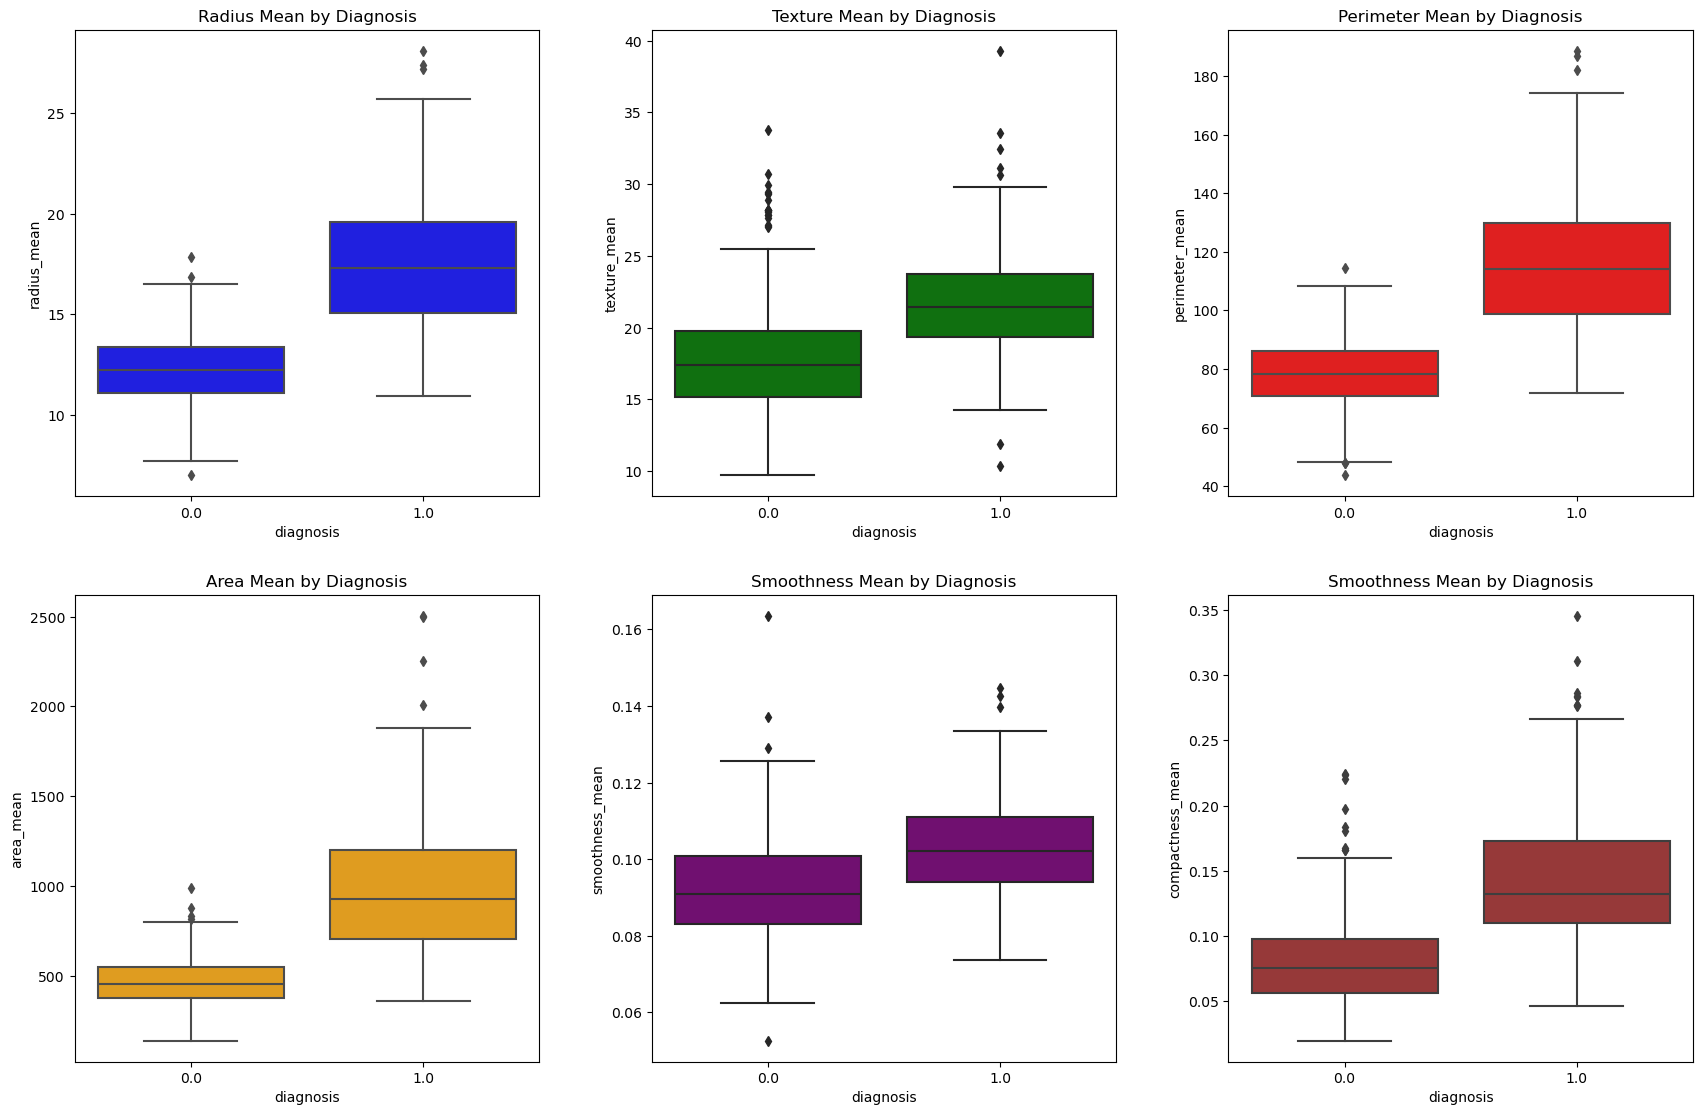

In [110]:
# Setup a maxplot figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.tight_layout(pad = 5.0)

#Boxplot for the key features
sns.boxplot(x = 'diagnosis', y = 'radius_mean', data = breast_cancer_cleaned, ax=axes[0,0], color = 'blue')
axes[0,0].set_title('Radius Mean by Diagnosis')

sns.boxplot(x = 'diagnosis', y = 'texture_mean', data = breast_cancer_cleaned, ax=axes[0,1], color = 'Green')
axes[0,1].set_title('Texture Mean by Diagnosis')

sns.boxplot(x = 'diagnosis', y = 'perimeter_mean', data = breast_cancer_cleaned, ax=axes[0,2], color = 'Red')
axes[0,2].set_title('Perimeter Mean by Diagnosis')

sns.boxplot(x = 'diagnosis', y = 'area_mean', data = breast_cancer_cleaned, ax=axes[1,0], color = 'Orange')
axes[1,0].set_title('Area Mean by Diagnosis')

sns.boxplot(x = 'diagnosis', y = 'smoothness_mean', data = breast_cancer_cleaned, ax=axes[1,1], color = 'Purple')
axes[1,1].set_title('Smoothness Mean by Diagnosis')

sns.boxplot(x = 'diagnosis', y = 'compactness_mean', data = breast_cancer_cleaned, ax=axes[1,2], color = 'brown')
axes[1,2].set_title('Smoothness Mean by Diagnosis')

plt.show()

Model Building

In [111]:
# Feature Scaling
scaler = StandardScaler()
X = breast_cancer_cleaned.drop(columns=['diagnosis'], axis=1)
X = scaler.fit_transform(X)
y = breast_cancer_cleaned['diagnosis']

In [112]:
# Save the cleaaned Dataset
breast_cancer_cleaned.to_csv('breast_cancer_cleaned.csv', index=False)

In [113]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
# model buildings
from sklearn.ensemble import GradientBoostingClassifier


models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),

}

In [115]:
# Train and test each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report: \n{classification_report(y_test, y_pred)}")

Logistic Regression Accuracy: 0.9736842105263158
Logistic Regression Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        71
         1.0       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Random Forest Accuracy: 0.9649122807017544
Random Forest Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        71
         1.0       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Gradient Boosting Accuracy: 0.9473684210526315
Gradient Boosting Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96     

In [116]:
# Hyperparameter tuning for all models
# Logistic Regression
param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.01, 0.1, 1, 10, 100],
            "penalty": ["l2"],
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [4, 6, 8, None],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(),
        "params": {
            "learning_rate": [0.01, 0.1, 0.2],
            "n_estimators": [50, 100, 200],
            "max_depth": [3, 5, 7]
        }
    },
    "Support Vector Machine": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10, 100],
            "kernel": ["linear", "rbf", "poly"],
            "gamma": ["scale", "auto"]
        }
    },
}


In [117]:
# train and test each model
best_estimators = {}
for model_name, config in param_grids.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(config["model"], config["params"], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_:.4f}")
    print("-" * 50)

Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression: 0.9780
--------------------------------------------------
Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score for Random Forest: 0.9648
--------------------------------------------------
Tuning hyperparameters for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best cross-validation score for Gradient Boosting: 0.9604
--------------------------------------------------
Tuning hyperparameters for Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score for Support Vector Machine: 0.9736
-------------------------------------

In [118]:
# Print the best estimators
for model_name, estimator in best_estimators.items():
    print(f"Best estimator for {model_name}: {estimator}")

Best estimator for Logistic Regression: LogisticRegression(C=0.1, solver='liblinear')
Best estimator for Random Forest: RandomForestClassifier(max_depth=6, min_samples_split=5, n_estimators=50)
Best estimator for Gradient Boosting: GradientBoostingClassifier(n_estimators=200)
Best estimator for Support Vector Machine: SVC(C=0.1, kernel='linear')


In [119]:
# Initializa the dictionary to store the roc_auc_score
model_performance = {
    "Model": [],
    "Accuracy": [],
    "F1 Score": [],
    "Precision": [],
    "Recall": [],
    "ROC AUC": []
}
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    model_performance["Model"].append(model_name)
    model_performance["Accuracy"].append(accuracy_score(y_test, y_pred))
    model_performance["F1 Score"].append(f1_score(y_test, y_pred))
    model_performance["Precision"].append(precision_score(y_test, y_pred))
    model_performance["Recall"].append(recall_score(y_test, y_pred))
    model_performance["ROC AUC"].append(roc_auc_score(y_test, y_prob) if y_prob is not None else None)

# Convert to DataFrame for easier plotting
performance_df = pd.DataFrame(model_performance)

In [120]:
# Save the models
import joblib

for model_name, model in best_estimators.items():
    joblib.dump(model, f"{model_name}.pkl")

# Load the models
loaded_models = {model_name: joblib.load(f"{model_name}.pkl") for model_name in best_estimators.keys()}
print(loaded_models)

# Predict using the loaded models
for model_name, model in loaded_models.items():
    y_pred = model.predict(X_test)
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{model_name} Classification Report: \n{classification_report(y_test, y_pred)}")
    print("-" * 50)

{'Logistic Regression': LogisticRegression(C=0.1, solver='liblinear'), 'Random Forest': RandomForestClassifier(max_depth=6, min_samples_split=5, n_estimators=50), 'Gradient Boosting': GradientBoostingClassifier(n_estimators=200), 'Support Vector Machine': SVC(C=0.1, kernel='linear')}
Logistic Regression Accuracy: 0.9912280701754386
Logistic Regression Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        71
         1.0       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

--------------------------------------------------
Random Forest Accuracy: 0.9649122807017544
Random Forest Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        71
         1.0       0.98      0.93      0.95        43
